In [5]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Load the input image
image_path = 'Sunflower.jpg'
input_image = imread(image_path)
height, width, num_channels = np.shape(input_image)

In [8]:
# Extract RGB components
red_channel, green_channel, blue_channel = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]

# Convert color image to grayscale using different weights
gamma_value = 1.400
red_weight, green_weight, blue_weight = 0.2126, 0.7152, 0.0722
grayscale_image = red_weight * red_channel ** gamma_value + green_weight * green_channel ** gamma_value + blue_weight * blue_channel ** gamma_value


C:\Users\bashe\AppData\Local\Temp\ipykernel_13888\4009353729.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


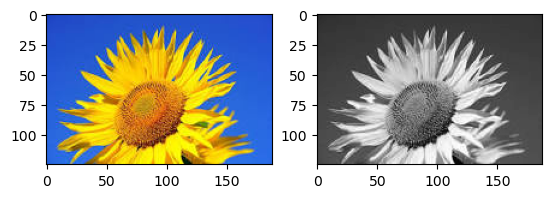

In [9]:
# Display the original image and grayscale image
fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
fig1.show()

In [10]:
# Define Sobel kernels for edge detection
sobel_kernel_x = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
sobel_kernel_y = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
rows, columns = np.shape(grayscale_image)
sobel_filtered_image = np.zeros((rows, columns))

C:\Users\bashe\AppData\Local\Temp\ipykernel_13888\3205270279.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


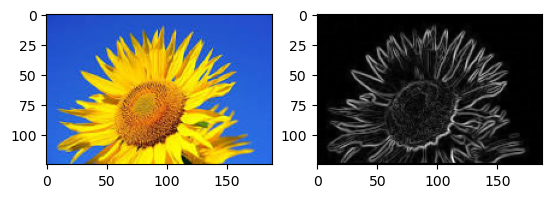

In [11]:
# Apply Sobel edge detection
for i in range(rows - 2):
    for j in range(columns - 2):
        gradient_x = np.sum(np.multiply(sobel_kernel_x, grayscale_image[i:i + 3, j:j + 3]))
        gradient_y = np.sum(np.multiply(sobel_kernel_y, grayscale_image[i:i + 3, j:j + 3]))
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gradient_x ** 2 + gradient_y ** 2)

# Display the original image and Sobel filtered image
fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()